### Contexto
### Há um número infinito de objetos no espaço sideral. Alguns deles estão mais perto do que pensamos. Mesmo que possamos pensar que uma distância de 70.000 Km não pode nos prejudicar, mas em escala astronômica, esta é uma distância muito pequena e pode atrapalhar muitos fenômenos naturais. Esses objetos/asteroides podem, assim, revelar-se prejudiciais. Por isso, é sábio saber o que está ao nosso redor e o que pode nos prejudicar entre eles. Assim, este conjunto de dados compila a lista de asteróides certificados pela NASA que são classificados como o objeto terrestre mais próximo.

Fonte: NASA Open API

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('neo.csv', sep = ',')

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
# Traduzindo as colunas
df.columns = ['id', 'nome','est_diametro_min','est_diametro_max','velocidade_relativa','miss_distancia',
              'corpo_orbita','objeto_sentinela','magnitude_absoluta','perigoso']

In [5]:
df.head()

,id,nome,est_diametro_min,est_diametro_max,velocidade_relativa,miss_distancia,corpo_orbita,objeto_sentinela,magnitude_absoluta,perigoso
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
# Remover valores duplicados
df = df.drop_duplicates()

In [7]:
# Remover valores NaN
df = df.dropna()

In [8]:
# mudar o tipo de dados da coluna miss_dintacia
tipo_dados = {'miss_distancia': int}
df = df.astype(tipo_dados)

### Qual o Diametro Mínimo do Objeto Identificado?

In [9]:
df.est_diametro_min.min()

0.0006089126

### Qual o Diametro Máximo do Objeto Identificado?

In [10]:
df.est_diametro_max.max()

84.7305408852

### Qual a Máxima Velocidade Relativa do Objeto Identificado?

In [11]:
df.velocidade_relativa.max()

236990.1280878666

In [12]:
# Verificando qual são os maiores objetos est_diametro_max >= 20
df_query = df.query('est_diametro_max >= 20')

In [13]:
df_query

,id,nome,est_diametro_min,est_diametro_max,velocidade_relativa,miss_distancia,corpo_orbita,objeto_sentinela,magnitude_absoluta,perigoso
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,54688077,Earth,False,10.31,False
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,53721237,Earth,False,9.23,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,26729521,Earth,False,10.31,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,31205919,Earth,False,10.31,False


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

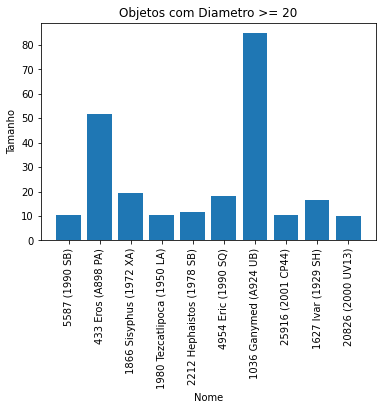

In [16]:
# Plotando um gráfico
import matplotlib.pyplot as plt
x = df_query['nome']
y = df_query['est_diametro_max']

plt.bar(x, y)
plt.title('Objetos com Diametro >= 20')
plt.xlabel('Nome')
plt.ylabel('Tamanho')
plt.xticks(rotation=90)